In [475]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/retail-dataset-analysis.xlsx')

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

## Part 1

In [476]:
selling_products = df.groupby('PRODUCTCODE').size().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)

best_selling_product = selling_products.iloc[0]

print(f'Best Selling Product: {best_selling_product[0]}')

peak_sale_period = df.groupby('QTR_ID').size().reset_index(name='Total Sales')

peak_sale_period = peak_sale_period.sort_values(by='Total Sales', ascending=False).iloc[0]

print(f"Peak Sale Quarter: {peak_sale_period['QTR_ID']}")

Best Selling Product: S18_3232
Peak Sale Quarter: 4


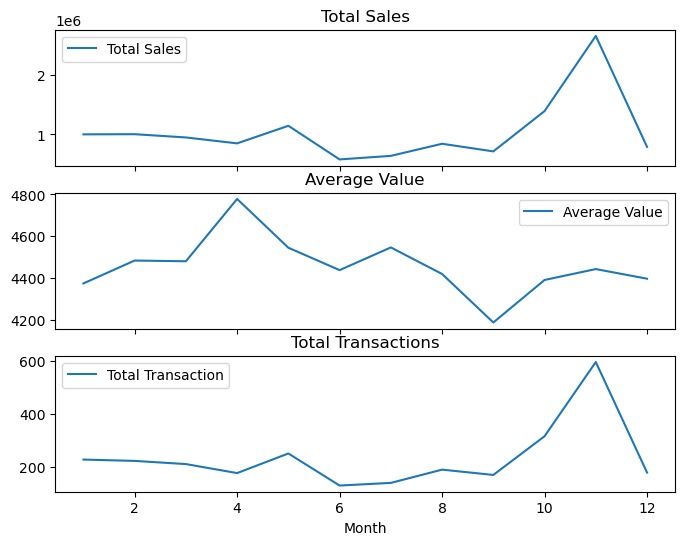

In [477]:
df_data = df.groupby('MONTH_ID').agg({
    'SALES' : 'sum',
    'SALES' : 'mean',
    'ORDERNUMBER' : 'count'
}).rename(columns={ 0: 'Total Sales', 1: 'Average Value', 2: 'Total Transctions'})

df_total_sales = df.groupby('MONTH_ID')['SALES'].sum()
df_avg_value = df.groupby('MONTH_ID')['SALES'].mean()
df_total_count = df.groupby('MONTH_ID')['ORDERNUMBER'].size()

fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

df_total_sales.plot(kind='line', ax=ax[0], label='Total Sales', title='Total Sales')
df_avg_value.plot(kind='line', ax=ax[1], label='Average Value', title='Average Value')
df_total_count.plot(kind='line', ax=ax[2], label='Total Transaction', title='Total Transactions')

plt.xlabel('Month')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [478]:
df['NETPROFIT'] = df['SALES'] - (df['QUANTITYORDERED'] * df['COSTPRICE']) 

product_category = df.groupby('PRODUCTCODE')[['NETPROFIT', 'SALES']].sum()

product_category['PROFITMARGIN'] = (product_category['SALES'] - product_category['NETPROFIT']) / product_category['SALES']

print(product_category)

highest_sales = product_category.sort_values(by='SALES', ascending=False).reset_index().iloc[0]

print("Highest Sale Product: " + highest_sales['PRODUCTCODE'])

             NETPROFIT      SALES  PROFITMARGIN
PRODUCTCODE                                    
S10_1678       43164.5  131805.13      0.672513
S10_1949       45901.0  142001.00      0.676756
S10_2016       42177.5  129298.23      0.673797
S10_4698       45346.5  136258.80      0.667203
S10_4757       44776.0  134215.82      0.666388
...                ...        ...           ...
S700_3505      40995.5  126026.78      0.674708
S700_3962      38064.0  115708.63      0.671036
S700_4002      40564.5  115962.78      0.650194
S72_1253       31800.0   83461.82      0.618987
S72_3212       32605.5   91229.12      0.642598

[109 rows x 3 columns]
Highest Sale Product: S18_3232


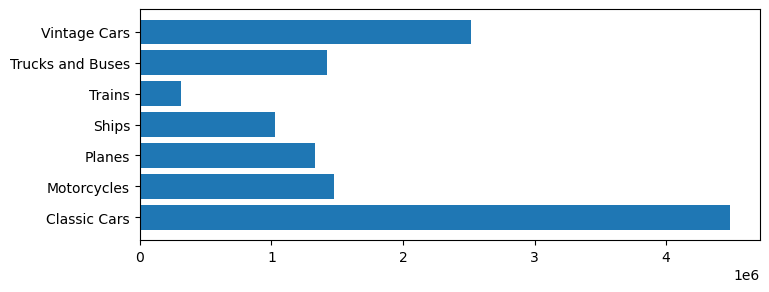

In [479]:
product_category = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

plt.subplots(figsize=(8, 3))

plt.barh(product_category['PRODUCTLINE'], product_category['SALES'])

plt.show()

In [480]:
customer_spending = df.groupby('CUSTOMERNAME')['SALES'].mean()

customer_spending

CUSTOMERNAME
AV Stores, Co.                 4061.906863
Alpha Cognac                   4370.814000
Amica Models & Co.             4101.692692
Anna's Decorations, Ltd        3911.682826
Atelier graphique              4510.451429
                                  ...     
Vida Sport, Ltd                4640.545484
Vitachrome Inc.                4181.634800
Volvo Model Replicas, Co       4704.984737
West Coast Collectables Co.    4953.786923
giftsbymail.co.uk              4219.812692
Name: SALES, Length: 92, dtype: float64

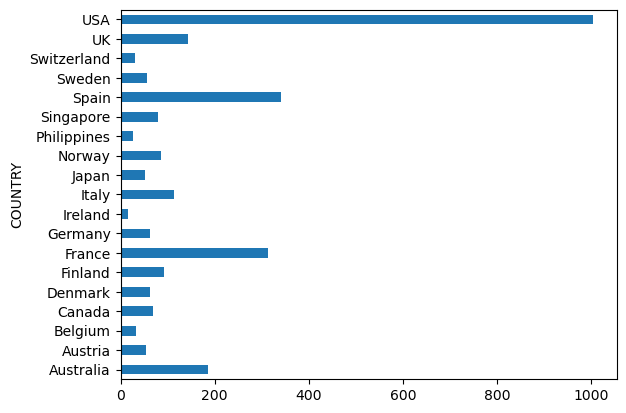

In [481]:
df.groupby('COUNTRY')['CUSTOMERNAME'].size().plot(kind='barh')

plt.show()

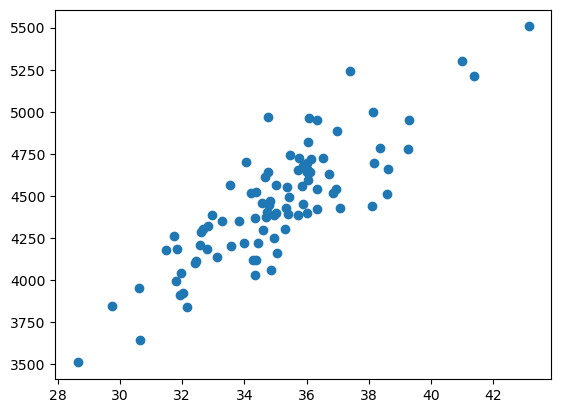

In [482]:
df_customer = df.groupby('CUSTOMERNAME')[['SALES', 'QUANTITYORDERED']].mean().reset_index()

plt.scatter(df_customer['QUANTITYORDERED'], df_customer['SALES'])

plt.show()

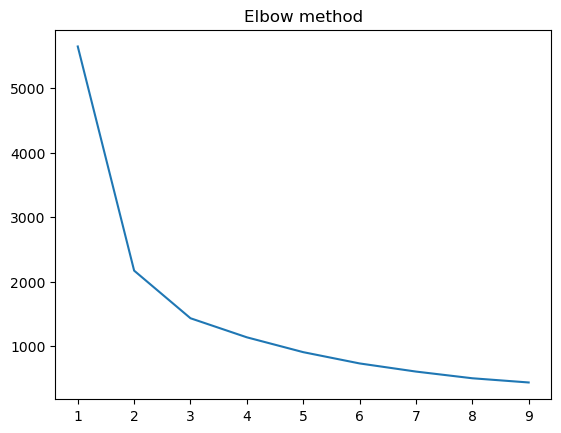

In [483]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['sale_t', 'quantity_t']] = scaler.fit_transform(df[['SALES', 'QUANTITYORDERED']])

def find_k(data, max_k):
    means = []
    inertias = []
    
    for i in range(1, max_k):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        means.append(i)
        inertias.append(kmeans.inertia_)
    
    plt.title("Elbow method")
    plt.plot(means, inertias)
    plt.show()

find_k(df[['sale_t', 'quantity_t']], 10)

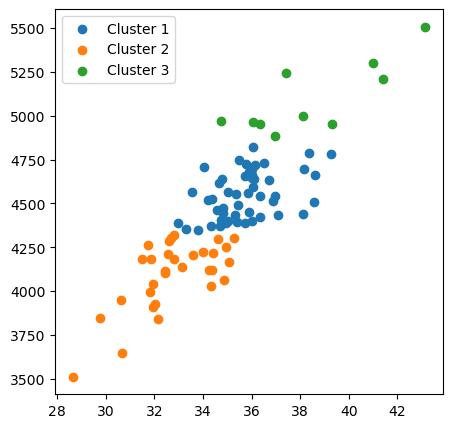

In [484]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_customer[['SALES', 'QUANTITYORDERED']])

df_customer['LABEL'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(0, 3):
    customer = df_customer[df_customer['LABEL'] == i]
    ax.scatter(customer['QUANTITYORDERED'], customer['SALES'], label=f'Cluster {i + 1}')

plt.legend()
plt.show()

### Part 2: Question 1


In [485]:
df = pd.read_csv('data/Q1-201904 sales reciepts.csv')

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [486]:
df['total_price'] = df['unit_price'] * df['quantity']

df_customer = df.groupby('customer_id').agg({
    'total_price' : 'sum',
    'transaction_id' : 'count',
    'transaction_date' : lambda x: x.max().day - x.min().day, 
})

df_customer['avg'] = df_customer['total_price'] / df_customer['transaction_id']
df_customer['lifesapn'] = df_customer['transaction_date'] / 365
df_customer['cltv'] = df_customer['avg'] * df['transaction_id'] * df_customer['lifesapn']

df_customer

,total_price,transaction_id,transaction_date,avg,lifesapn,cltv
customer_id,,,,,,
0,119614.67,25033,26,4.778279,0.071233,2.382594
1,29.20,8,27,3.650000,0.073973,2.970000
2,90.35,21,25,4.302381,0.068493,5.598989
3,188.90,31,23,6.093548,0.063014,12.287265
4,28.75,9,24,3.194444,0.065753,6.931507
...,...,...,...,...,...,...
8497,66.00,12,23,5.500000,0.063014,83.524658
8498,39.75,9,24,4.416667,0.065753,69.989041
8499,58.10,12,28,4.841667,0.076712,89.882557


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(df_customer[['cltv']])

df_customer['scaler_cltv'] = scaler.transform(df_customer[['cltv']])

def segement_cust(x):
    if x > 66.6:
        return "Higher"
    if x > 33.33:
        return "Medium"
    else:
        return "Lower"

df_customer.reset_index(inplace=True)

df_customer['segment'] = df_customer['scaler_cltv'].apply(segement_cust)

df_customer[['customer_id', 'cltv', 'segment']]

test1 (__main__.Test.test1) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## Question 2

In [488]:
df = pd.read_csv('data/Q2 - avocado.csv')

df_avocado = df[df['type'] == "conventional"].reset_index()

df_avocado_first = df_avocado.loc[0]
df_avocado_last = df_avocado.loc[len(df_avocado) - 1]

change_of_quantity = (df_avocado_last['Total Volume'] - df_avocado_first['Total Volume']) / df_avocado_first['Total Volume']

change_of_price = (df_avocado_last['AveragePrice'] - df_avocado_first['AveragePrice']) / df_avocado_first['AveragePrice']

conventional_ped = change_of_quantity / change_of_price

df_avocado_organic = df[df['type'] == "organic"].reset_index()

df_avocado_first = df_avocado_organic.loc[0]
df_avocado_last = df_avocado_organic.loc[len(df_avocado_organic) - 1]

change_of_quantity = (df_avocado_last['Total Volume'] - df_avocado_first['Total Volume']) / df_avocado_first['Total Volume']

change_of_price = (df_avocado_last['AveragePrice'] - df_avocado_first['AveragePrice']) / df_avocado_first['AveragePrice']

organic_ped = change_of_quantity / change_of_price

data = {
    "type" : ["conventional", "organic"],
    "price elasticity" : [conventional_ped, organic_ped] 
}

df = pd.DataFrame(data)

df['price elasticity'] = abs(df['price elasticity'])

def price_adjust(x):
    if x > 1:
        return "Lower Price"
    else:
        return "Increase Price"

df['price adjustment'] = df['price elasticity'].apply(price_adjust)

df

,type,price elasticity,price adjustment
0,conventional,37.545900,Lower Price
1,organic,145.304407,Lower Price


## Question 3

In [489]:
df = pd.read_csv('data/Q3b - shampoo.txt', sep='\t')
df['Date'] = "200"+ df['Year'].astype(str) + "-" + df['Month'].astype(str) + "-" + "1"
df['Date'] = pd.to_datetime(df['Date'])

In [490]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

test = adfuller(df['Sales'])

print(test[1])

1.0


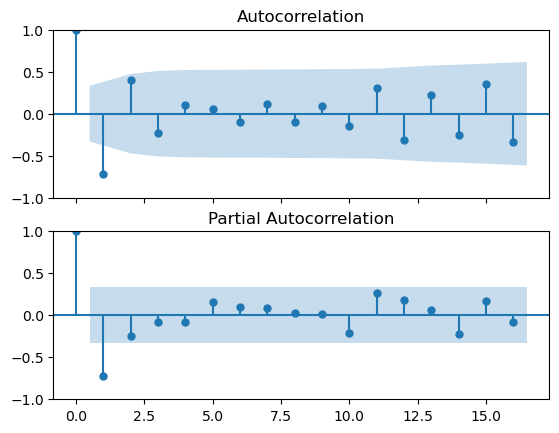

In [491]:
fig, ax = plt.subplots(2, 1, sharex=True)
plot_acf(df['Sales'].diff().dropna(), ax=ax[0])
plot_pacf(df['Sales'].diff().dropna(), ax=ax[1])

plt.show()

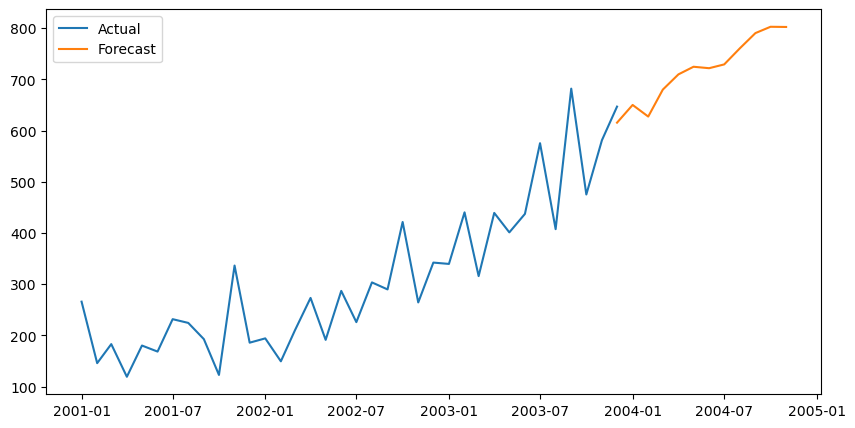

In [492]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df['Sales'], order=(5, 1, 3))
model_fit = arima.fit()

fig, ax = plt.subplots(figsize=(10, 5))

date_range = pd.date_range(df['Date'].max(), periods=12, freq='MS')

plt.plot(df['Date'], df['Sales'], label='Actual')
plt.plot(date_range, model_fit.forecast(12), label='Forecast')

plt.legend()

plt.show()

In [493]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -192.696
Date:                Thu, 29 Aug 2024   AIC                            403.392
Time:                        12:45:17   BIC                            417.390
Sample:                             0   HQIC                           408.224
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4535      0.579      0.783      0.433      -0.681       1.588
ar.L2         -0.1200      0.314     -0.382      0.703      -0.736       0.496
ar.L3         -0.1470      0.286     -0.513      0.608      -0.708       0.414
ar.L4          0.4233      0.443      0.956      0.339      -0.445       1.291
ar.L5          0.3276      0.481      0.682      0.495      -0.614       1.269
ma.L1         -1.7717      4.888     -0.363      0.717     -11.351       7.808
ma.L2          1.7742     13.613      0.130      0.896     -24.907      28.455
ma.L3         -0.8124      8.116     -0.100      0.920     -16.719      15.094
sigma2      3556.1189   3.33e+04      0.107      0.915   -6.18e+04    6.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.98   Prob(JB):                         0.62
Heteroskedasticity (H):               1.05   Skew:                             0.07
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""